In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


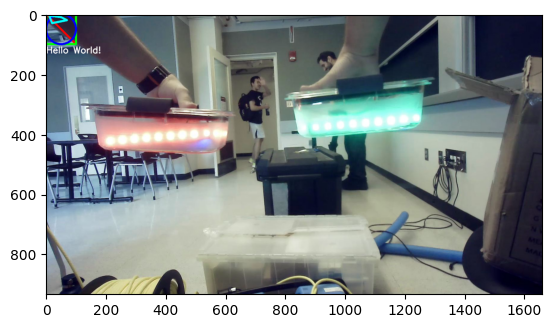

In [12]:

img = cv2.imread('image.jpeg')
cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255), 5)
cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
plt.imshow(img)



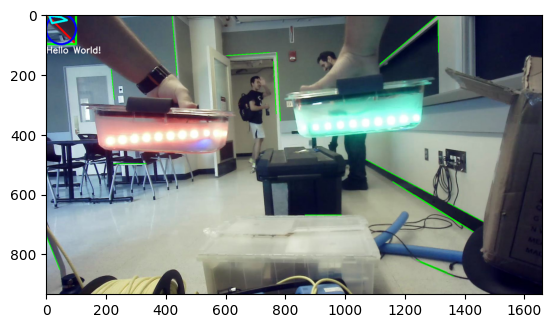

In [13]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 500, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)



In [14]:
from dt_apriltags import Detector

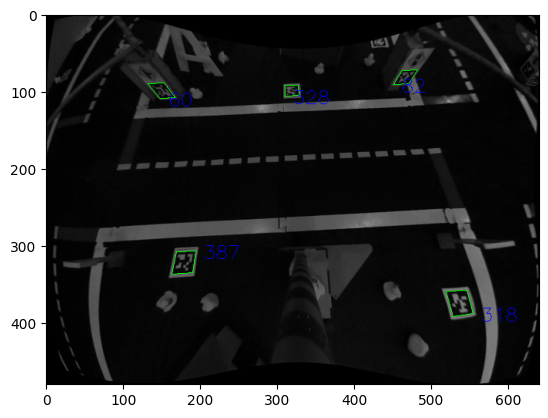

In [15]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=10)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))


plt.imshow(color_img)


In [16]:
slopes = (lines[:, :, 3] - lines[:, :, 1]) / (lines[:, :, 1] - lines[:, :, 0])
print(len(slopes))

17


In [17]:
def get_slopes(frame):
    # img = cv2.imread('rov_pool.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    edges = cv2.Canny(gray, 600, 1200, apertureSize=5) # detect edges
    lines = cv2.HoughLinesP(
                    edges,
                    1,
                    np.pi/180,
                    100,
                    minLineLength=500,
                    maxLineGap=30,
            ) # detect lines
    
    if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"({x1}, {y1})", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                cv2.putText(frame, f"({x2}, {y2})", (x2, y2), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            return (lines[:, :, 3] - lines[:, :, 1]) / (lines[:, :, 1] - lines[:, :, 0])
    return None

cap = cv2.VideoCapture("AUV_vid.mkv")
success = cap.grab()
new_frames = []
slopes = []
i = 0
while success:
    i += 1
    if i % 50 == 0:
        _, frame = cap.retrieve()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        slope = get_slopes(frame)
        if slopes is not None:
            new_frames.append(frame)
            slopes.append(slope)
    success = cap.grab()

[ERROR:0@103.504] global cap.cpp:164 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.0) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): AUV_vid.mkv in function 'icvExtractPattern'




In [18]:
def frames(): 
    cap = cv2.VideoCapture('AprilTagTest.mkv')
    success = cap.grab()
    frames = []
    # slopes = []
    at_detector = Detector(families='tag36h11',
                        nthreads=1,
                        quad_decimate=1.0,
                        quad_sigma=0.0,
                        refine_edges=1,
                        decode_sharpening=0.25,
                        debug=0)
    cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))
    camera_params = (cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )
    i=0
    while success:
        if i % 100  == 0:
            _, frame = cap.retrieve()
            height, width, depth = frame.shape
            center = (width/2,height/2)
            print(center)
            cv2.line(frame, (int(width/2), 0), (int(width/2), int(height)), (255, 0, 0), 5)
            cv2.line(frame, (0,int(height/2)), (int(width), int(height/2)), (255, 0, 0), 5)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            tags = at_detector.detect(frame, True, camera_params, 0.1)
            color_img = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
            for tag in tags:
                for idx in range(len(tag.corners)):
                    cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))
                    print(tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)))    
                    cv2.putText(color_img, str(tag.tag_id),
                    org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=2,
                    color=(0, 0, 255))
                (cX, cY) = (int(tag.center[0]), int(tag.center[1]))
                cv2.circle(color_img, (cX, cY), 5, (0, 0, 255), -1)
                dist = np.sqrt(np.power(cX-center[0],2)+np.power(cY-center[1],2))
                print((cX-center[0],cY-center[1]),dist)
            plt.imshow(color_img)
            plt.pause(0.01)  # Pause for a short time to show the figure
            plt.clf()
        i+=1
        success = cap.grab()

# Release the video capture
cap.release()

# Close the plot window
plt.close()

In [19]:
def getCenter(center):
    height, width, depth = frame.shape
    center = (width/2,height/2)
 



    

(960.0, 540.0)
(1198, 223) (1002, 218)
(1002, 218) (993, 410)
(993, 410) (1192, 417)
(1192, 417) (1198, 223)
(136.0, -224.0) 262.0534296665472


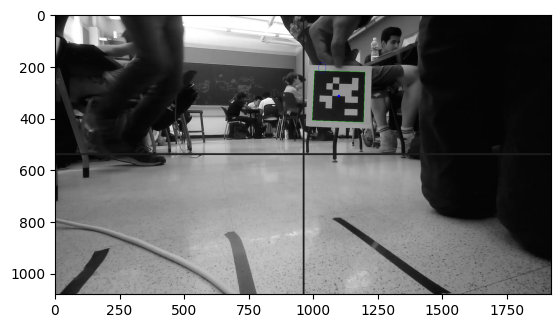

(960.0, 540.0)
(1236, 342) (1047, 310)
(1047, 310) (1012, 504)
(1012, 504) (1200, 536)
(1200, 536) (1236, 342)
(164.0, -117.0) 201.45719148245863


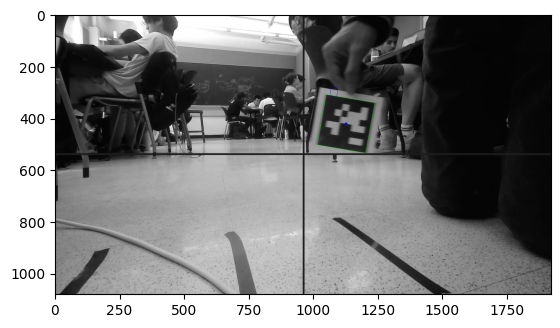

(960.0, 540.0)
(925, 192) (784, 154)
(784, 154) (759, 293)
(759, 293) (893, 329)
(893, 329) (925, 192)
(-120.0, -296.0) 319.3994364428341


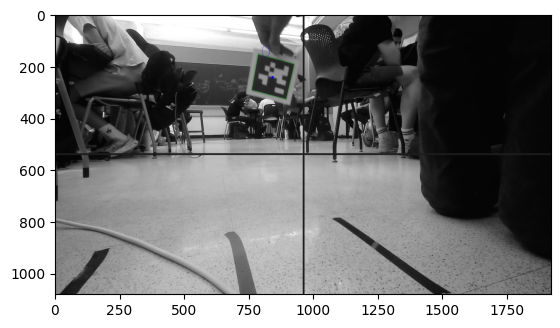

(960.0, 540.0)


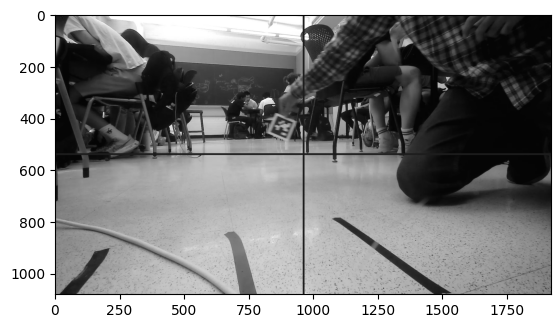

(960.0, 540.0)


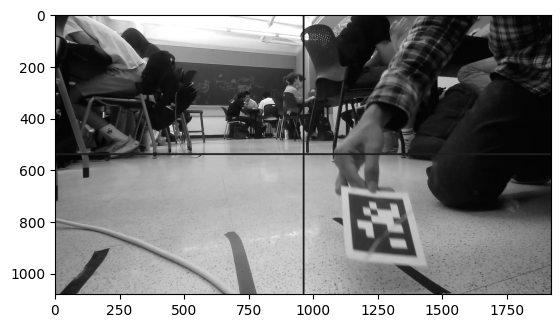

(960.0, 540.0)
(1265, 848) (1109, 860)
(1109, 860) (1170, 942)
(1170, 942) (1354, 918)
(1354, 918) (1265, 848)
(265.0, 348.0) 437.41170537606786


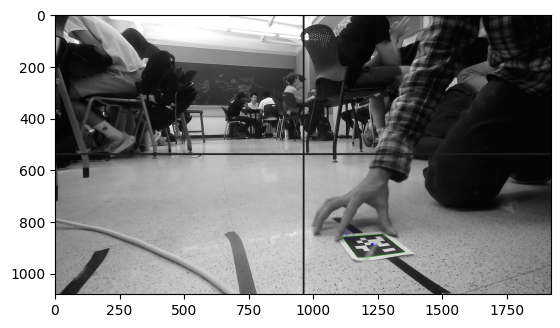

(960.0, 540.0)


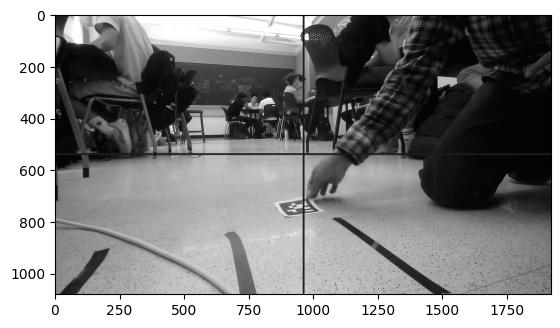

(960.0, 540.0)


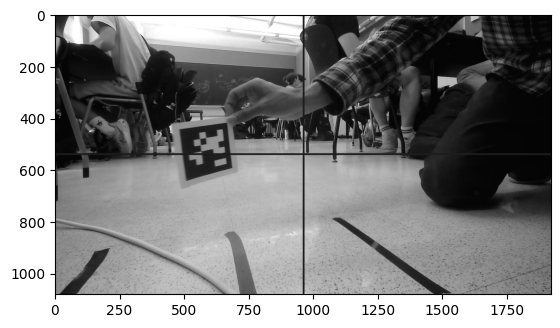

(960.0, 540.0)
(1247, 283) (1084, 295)
(1084, 295) (1099, 461)
(1099, 461) (1263, 446)
(1263, 446) (1247, 283)
(214.0, -170.0) 273.30568965903365


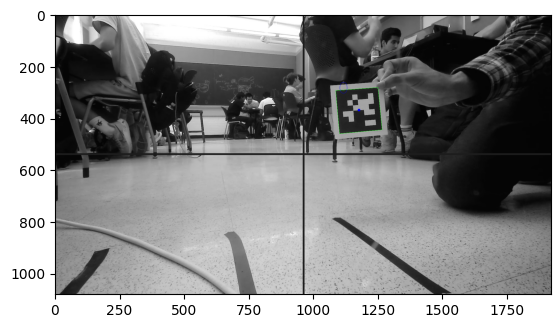

TypeError: 'NoneType' object is not subscriptable

<Figure size 640x480 with 0 Axes>

In [20]:
frames = frames()
height, width, layers = frame.shape



In [ ]:
# height, width, layers = new_frames[0].shape
# video = cv2.VideoWriter('ouput.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, (width,height))
# for frame in new_frames:
#     video.write(frame)
# video.release()